In [1]:
# Compare os resultados obtidos no item anterior com o KNN

In [2]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/traffic_brazil.csv", delimiter=";", decimal=",")

In [4]:
data['Slowness in traffic (%)'] = data['Slowness in traffic (%)'].astype(float)

In [5]:
data = data.sort_values(by='Slowness in traffic (%)')[-20:]

In [6]:
# Remover a coluna da hora
dataProcess = data.drop(['Hour (Coded)'], axis=1)

In [7]:
X_interestData = dataProcess.drop(['Slowness in traffic (%)'], axis=1)
y_interestData = dataProcess['Slowness in traffic (%)']

training_scores_X, training_scores_Y = X_interestData[:-1], y_interestData[:-1]

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)

clf.fit(training_scores_X, training_scores_encoded)

clf.score(training_scores_X, training_scores_encoded)

0.9473684210526315

In [8]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [9]:
# Criar data frame com as causas e os respectivos pesos 
df = pd.DataFrame([linear.coef_], columns=X_interestData.keys())

NameError: name 'linear' is not defined

In [10]:
# Remover categorias com o peso menor ou igual a 0

def removeNegativeColumns(dataFrame):
    
    indexToBeRemoved = []
        
    for i in range(0, len(dataFrame.keys())):
        columnValue = dataFrame[dataFrame.keys()[i]].values[0]
        if columnValue <= 0:
            indexToBeRemoved.append(i)
        
    return dataFrame.drop(dataFrame.columns[indexToBeRemoved], axis=1)

df = removeNegativeColumns(df)

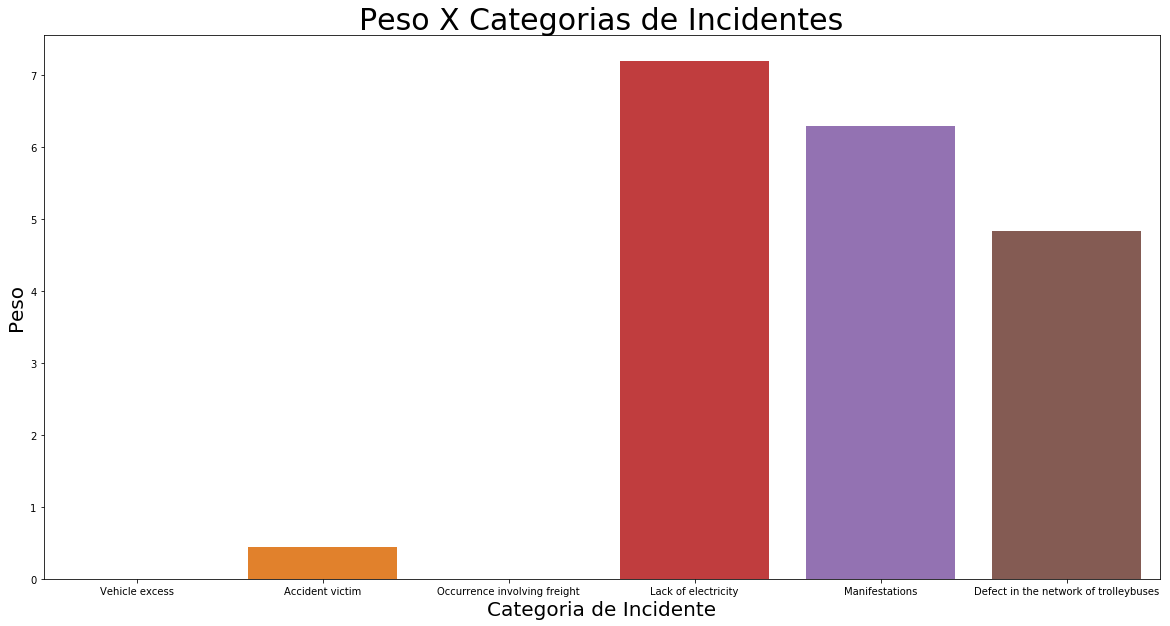

In [11]:
plt.figure(figsize=(20,10))

sns.barplot(data=df);

plt.title('Peso X Categorias de Incidentes', fontsize=30)
plt.ylabel('Peso', fontsize=20)
plt.xlabel('Categoria de Incidente', fontsize=20)
plt.show()

In [12]:
# Não, os pesos obtidos pela regressão linear não confirmam os dados obtidos analisando o gráfico.

# Conforme a analise do gráfico, esses são as 3 principais causas de lentidão no trânsito
# - 1. Caminhão quebrado
# - 2. Ponto de alagamento
# - 3. Queda de energia / Semafaros desligados / Acidentes com vítimas

# De acordo com os pesos obtidos pela regressão linear, esses são as 3 principais causas de lentidão no trânsito:
# - 1 Queda de energia
# - Manifestções
# - Defeito na rede dos ônbus elétricos